<a href="https://colab.research.google.com/github/LucasMirachi/portfolio/blob/master/Analise_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados utilizando a biblioteca Seaborn


---


  Este notebook possui como finalidade se aprender a utlizar a biblioteca Seaborn para análise de dados. De modo geral, Seaborn é uma biblioteca baseada no Matplotlib, porém possui algumas funcionalidades a mais, além de possuir um visual mais moderno e agradável.
  
O dataset escolhido para se fazer a análise é um dataset real com dados da eficiência energética do combustível de diversos veículos modelo 2019 comercializados nos EUA, de diferentes fabricantes e configurações.

Fonte: Sundog Education, apresentado no curso "Autonomous Cars: Deep Learning and Computer Vision in Python" disponíível na plataforma Udemy (https://www.udemy.com/course/autonomous-cars-deep-learning-and-computer-vision-in-python/).

In [ ]:
# Importando o matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importando o Pandas e criando um Dataframe com o dataset, inicialmente em formato csv
import pandas as pd

df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")

Para visualizar as colunas e as cinco primeiras linhas do Dataset, usa-se o comando df.head().


In [ ]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


Analisando o DataFrame, vemos que temos uma referente a cada carro, com informações sobre o nome do fabricante do veículo, o nome do modelo do veículo, a cilindrada do motor, o número de cilindros do motor, o tipo de transmissão, o valor d consumo de milhas por galão (MPG) na cidade, MPG na estrada e a quantidade de marchas da transmissão.

---

Primeiro, irei criar um gráfico de barras com o Matplotlib, e em seguida recriá-lo com o Seaborn, para fazer uma comparação entre ambos.

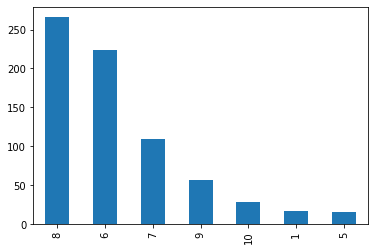

In [ ]:
gear_counts = df['# Gears'].value_counts()

gear_counts.plot(kind='bar')

In [ ]:
# Importando o Seaborn e setando 
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Utilizando o mesmo comando de dar plot, já pode-se perceber que temos um visual com tons pastéis, o que torna o gráfico com uma aparência mais moderna, além de já vir com umas linhas de grade bem sutis ao fundo, possibilitando uma melhor comparação entre os tamanhos das das barras do gráfico.

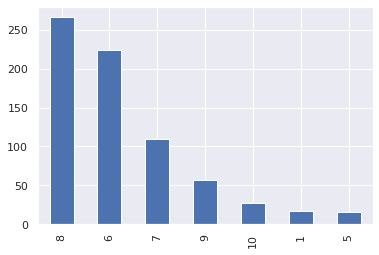

In [ ]:
gear_counts.plot(kind='bar')

O Seaborn possui alguns tipos de gráficos que o Matplotlib não possui nativamente, como por exemplo o "distplot", que é usado para plotar um histograma em conjunto com uma curva da distrubuição.

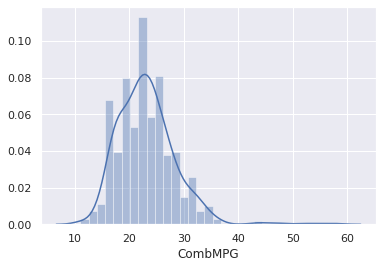

In [ ]:
sns.distplot(df['CombMPG'])

Uma das funcionalidades mais legais é o "pair plot", que permite fazer uma vizualização de vários gráficos com diversas combinações de atributos, o que permite se analizar de forma dinâmica os padrões das features que se deseja analizar.

In [ ]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


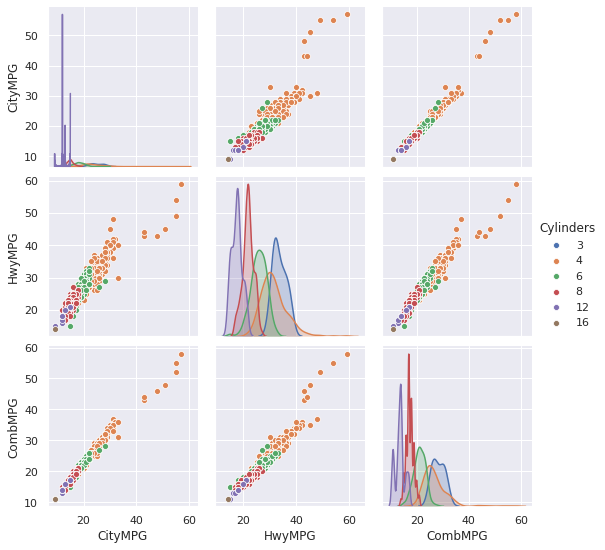

In [ ]:
sns.pairplot(df2, hue='Cylinders', height=2.5);

Com esta visualização, podemos observar a relação entre o número de cilindros que o motor possui com o MPG (ou Miles per Gallon - Milhas por Galão de combustível), mostrando os gráficos de consumo na cidade (City MPG), na estrada (Highway MPG) e o combinado de cidade e estrada (CombMPG).

* A primeira coisa que pode-se notar é que, quanto mais cilindros o motor tem, 
menor será o MPG (seja na cidade ou na estrada), o que faz sentido: motores com mais cilindros tendem a ter mais potência e produzir mais torque, consequentemente exigem mais combustíível para seu funcionamento, logo, possuem uma autonomia menor.

* Algo interessante que é possíível se observar é que os motores de 4 cilindros possuem um MPG bem mais espalhado do que os demais motores. Temos tanto modelos com um rendimento excelente (com um alto MPG), como temos também modelos de carros com autonomia semelhantes às dos motores de 6 ou até mesmo 8 cilindros. Por esta vizualização não é possível se obter uma resposta satisfatória a este fenômeno, mas, baseando em minha experiência e conhecimento do mercado de veículos americano, creio que esta diferença se dá devido ao fato de que os motores de 4 cilindros são maioria no mercado. Com isso, temos carros de maior e menor porte que são equipadas com motores do mesmo tamanho (de 4 cilindros no caso) e, dinâmicamente, os carros menores irão possuir autonomia melhor do que de carros maiores equipados com o mesmo motor (podendo haver variação de marcas, da forma de alimentação dos motores - se é aspirado ou turbo -, dentre vários outros fatores). Vale a pena fazer uma outra visualização para entender melhor sobre o que levou a estes dados espalhados dos motores de 4 cilindros.
---


O Seaborn também possui os gráficos de pontos, a.k.a gráfico de dispersãão, ou scatterplots. Este tipo de gráfico ploto pontos individuais para dois eixos escolhidos, possibilitando com que se visualize como os dados estão distribuídos naquelas dimensões.

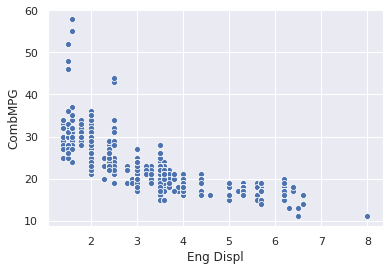

In [ ]:
sns.scatterplot(x="Eng Displ", y="CombMPG", data=df)

O Seaborn tem tambéém o "jointplot", que combina o gráfico de pontos com histogramas nos dois eixos. Isso permite visualizar os pontos de dados individuais e a distribuição em ambas as dimensões ao mesmo tempo.

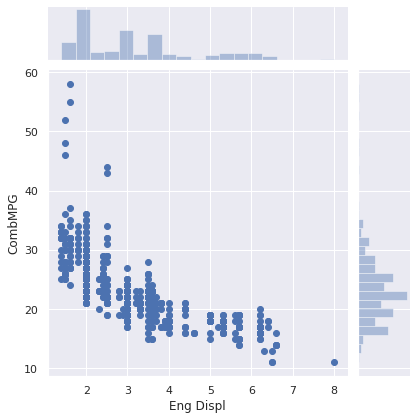

In [ ]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df)

O "lmplot" é um scatterplot, mas com uma linha de regressão linear calculada e sobreposta aos dados.

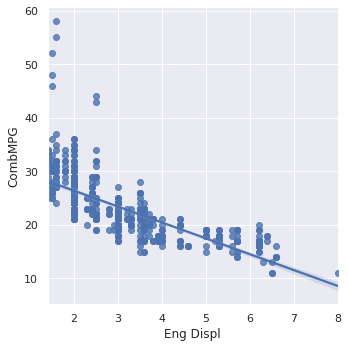

In [ ]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df)

A seguir, irei plotar um "gráfico de caixa", ou box plot. Isso é chamado de plotagem "box and whiskers", que é útil para visualizar valores para uma determinada categoria sem se distrair com os outliers. Cada caixa representa o intervalo entre o primeiro e o terceiro quartil dos dados, com uma linha representando o valor mediano. Os "whiskers" que se estendem da caixa representam a disseminação do restante dos dados, além dos valores discrepantes claros que são plotados como pontos individuais fora dos whiskers.

Para testar este tipo de visualização, farei gráficos de caixas para cada fabricante de veículo, visualizando as classificações de milhas por galão nos veículos que produzem. Isso nos permite analisar a difusão das classificações MPG em todos os veículos que cada fabricante oferece.

Existem muitos fabricantes, portanto, para tornar o gráfico resultante legível, aumentaremos o tamanho padrão do número da Seaborn e também usaremos set_xticklabels para girar os rótulos em 45 graus.

[Text(0, 0, 'aston martin'),
 Text(0, 0, 'Volkswagen Group of'),
 Text(0, 0, 'General Motors'),
 Text(0, 0, 'Ferrari'),
 Text(0, 0, 'FCA US LLC'),
 Text(0, 0, 'Jaguar Land Rover L'),
 Text(0, 0, 'MAZDA'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Ford Motor Company'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Rolls-Royce'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Kia'),
 Text(0, 0, 'Maserati'),
 Text(0, 0, 'Mitsubishi Motors Co')]

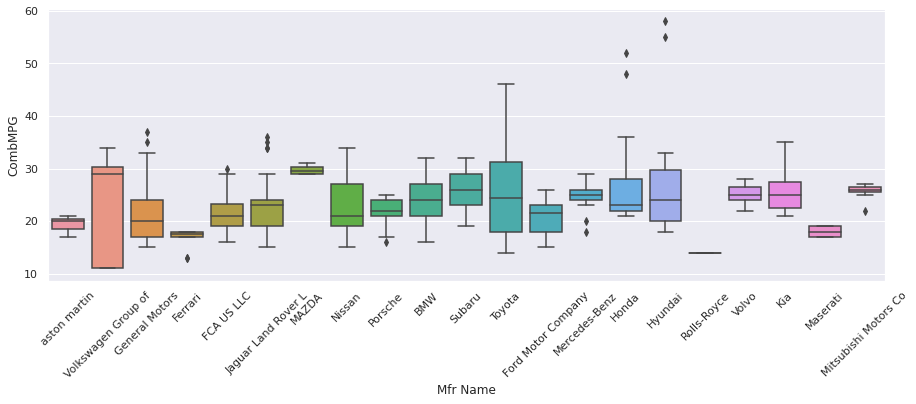

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Fazer uma análise e comentar que a Volkswagen e Toyota possuem as maiores caixas. Palpite: Volks e Toyota possuem uma vasta gama de veículos leves, médios e pesados comercializados nos EUA (Golf, Jetta, Passat, Tiguan da Volks e RAV4, Corolla, Tacoma e Highlander da Toyota). As demais marcas são mais focalizadas, acho (Porsche e Ferrari só vende carro potente, BMW tbm talvez. Verificar isso). Descobrir o pq da GM e Fors estarem tão menores, eram para estar do naipe da Volks?)

Outra maneira de visualizar os mesmos dados é o "swarm plot". Em vez de caixas, ele plota cada ponto de dados individual - mas faz de maneira que os agrupe com base em sua distribuição.

[Text(0, 0, 'aston martin'),
 Text(0, 0, 'Volkswagen Group of'),
 Text(0, 0, 'General Motors'),
 Text(0, 0, 'Ferrari'),
 Text(0, 0, 'FCA US LLC'),
 Text(0, 0, 'Jaguar Land Rover L'),
 Text(0, 0, 'MAZDA'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Ford Motor Company'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Rolls-Royce'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Kia'),
 Text(0, 0, 'Maserati'),
 Text(0, 0, 'Mitsubishi Motors Co')]

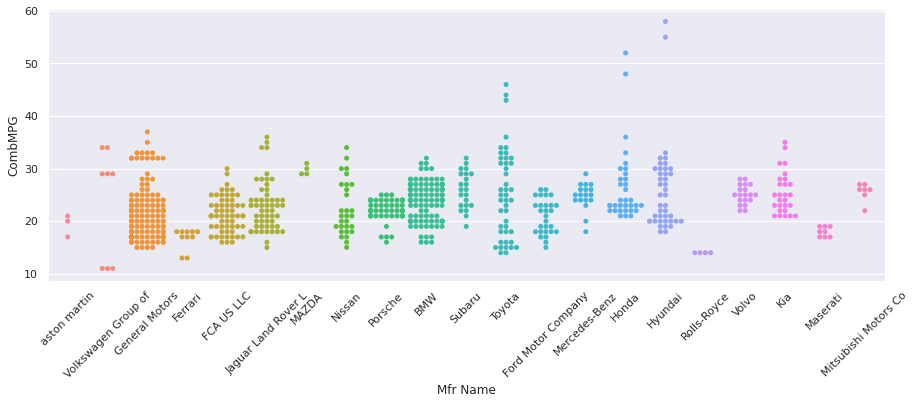

In [ ]:
ax=sns.swarmplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Outra ferramenta é o "count plot". É basicamente a mesma coisa que um histograma, mas para dados categóricos. Permite contar quantas vezes cada categoria no eixo X ocorre em seus dados e plotá-la.

[Text(0, 0, 'aston martin'),
 Text(0, 0, 'Volkswagen Group of'),
 Text(0, 0, 'General Motors'),
 Text(0, 0, 'Ferrari'),
 Text(0, 0, 'FCA US LLC'),
 Text(0, 0, 'Jaguar Land Rover L'),
 Text(0, 0, 'MAZDA'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Ford Motor Company'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Rolls-Royce'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Kia'),
 Text(0, 0, 'Maserati'),
 Text(0, 0, 'Mitsubishi Motors Co')]

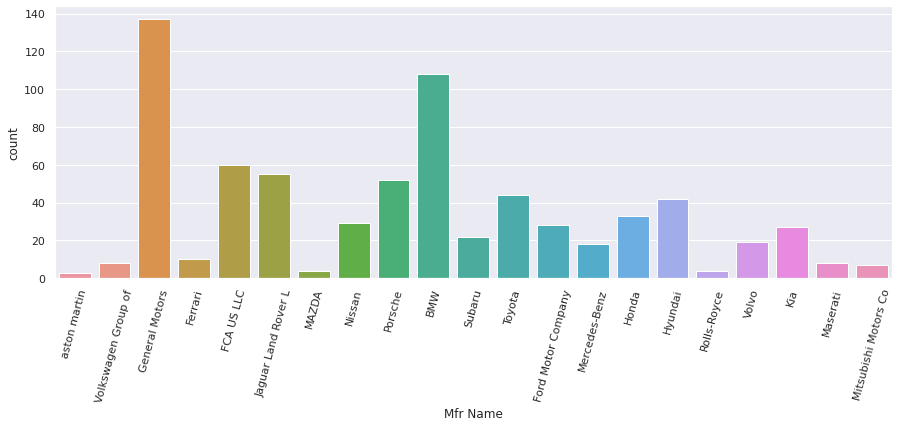

In [ ]:
ax=sns.countplot(x='Mfr Name', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)

Aqui, podemos observar que a General Motors oferece mais modelos de veículos do que qualquer outro, com a BMW logo atrás.

Também vemos que as marcas que possuem uma menor gama de veículos são a japonesa Mazda, e as inglesas Aston Martin e Rolls-Royce, o que novamente faz bastante sentido, uma vez que estas marcas produzem veículos bem específicos, como esportivos e carros de luxo.

Pessoalmente, achei esta visualizaçãão bem interessante, pois eu acreditava que a Volswagem e Ford ofereciam uma maior gama de veículos, se aproximando da GM neste quesito.

---

O Seaborn também é capaz de plotar um gráfico "mapa de calor", que é capaz de fornecer os dados em um gráfico em que os valores são representados como padrões de cores.

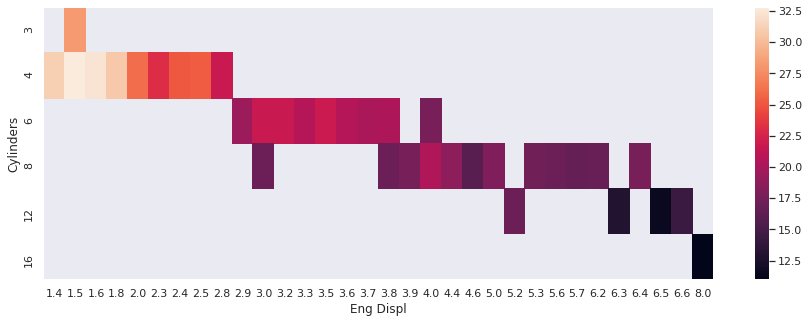

In [ ]:
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2)

O mapa de calor resultante mostra todos os valores de cilindrada do motor ao longo do eixo X e todos os valores do cilindro ao longo do eixo Y. Para cada célula da tabela, a classificação MPG média real para essa combinação de cilindros e cilindrada é representada não como um número, mas como uma cor que varia de escuro para valores pequenos e claro para valores maiores.

Com este gráfico, pode-se observar uma tendência em que as coisas ficam progressivamente mais escuras à medida que avançamos da parte superior esquerda do gráfico para a parte inferior direita. O que faz sentido: classificações mais altas de MPG estão associadas a números mais baixos de cilindros e valores mais baixos de cilindrada do motor. Quando chegamos a um motor de 8 litros e 16 cilindros, o MPG médio está no pior dos 12, representado pela cor preta.

Outra informação legal que podemos tirar deste gráfico é que muitas das células simplesmente não possuem cores. Isso significa que a combinação do número de cilindros do eixo Y com a cilindrada do eixo X não corresponde a nenhum veículo presente no dataset. Por exemplo, pode-se notar que não existem dados para um motor com 3 cilindros e 8.0L de cilindrada, porque este tipo de motor simplesmente não existe!

---


# Conclusão

Com esta análise, podemos notar um resultado que de certo modo já era esperado: quanto mais cilindros e quanto maior a cilindrada do motor, menor será a eficiência do mesmo! 